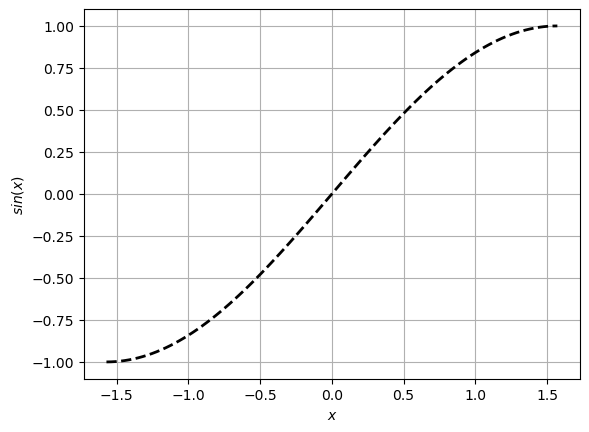

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 画出函数 y=sin(x) 在 [-pi/2, pi/2] 区间上的函数图像
X = np.linspace(-np.pi / 2, np.pi / 2, 100)
y = np.sin(X)

plt.plot(X, y, color='black', linewidth=2, linestyle='--')
plt.xlabel('$x$')
plt.ylabel('$sin(x)$')
plt.grid()
plt.show()

In [16]:
# 准备自变量 x 和函数值 t
X = np.linspace(-np.pi / 2, np.pi / 2, 100)
T = (np.sin(X) + 1) / 2

In [17]:
# 正向传播，输入变量 x 的流动
def forward(x, w, b):
    u = w * x + b
    y = 1 / (1 + np.exp(-u))
    return y

In [18]:
# 反向传播，求导数
def backward(x, y, t):
    delta = y * (y - t) * (1 - y)
    grad_w = delta * x
    grad_b = delta
    return grad_w, grad_b

In [21]:
def draw_output(X, Y, T, epoch):
    plt.plot(X, T, linestyle='--', color='black', linewidth=2)
    plt.scatter(X, Y, marker='o', color='blue')

    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.grid()

    print(f'Epoch: {epoch}')
    print(f'Error: {1.0 / 2 * np.sum((Y-T) ** 2)}')

    plt.show()

Epoch: 0
Error: 4.944806846912912


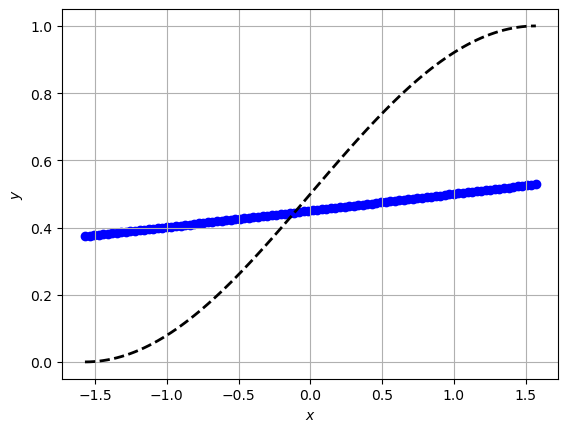

Epoch: 1
Error: 2.0462829011257067


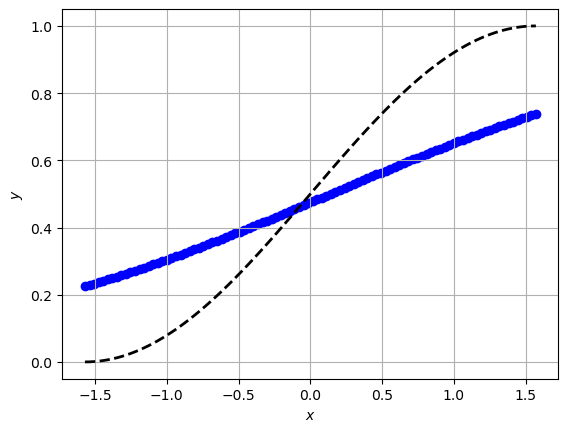

Epoch: 2
Error: 1.0932811771121385


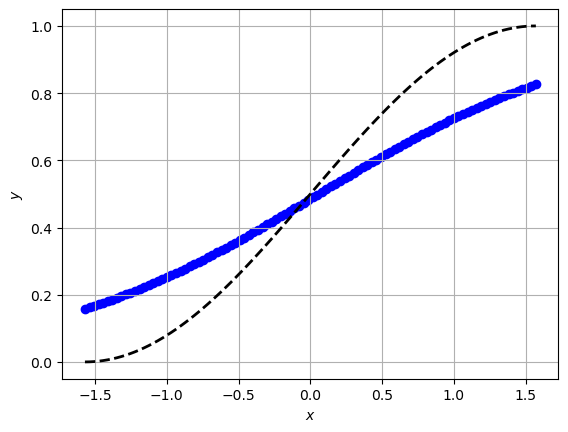

Epoch: 3
Error: 0.6834295613874163


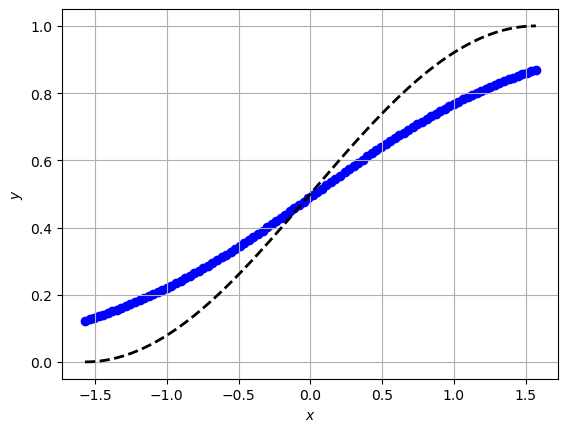

Epoch: 4
Error: 0.4690930049150815


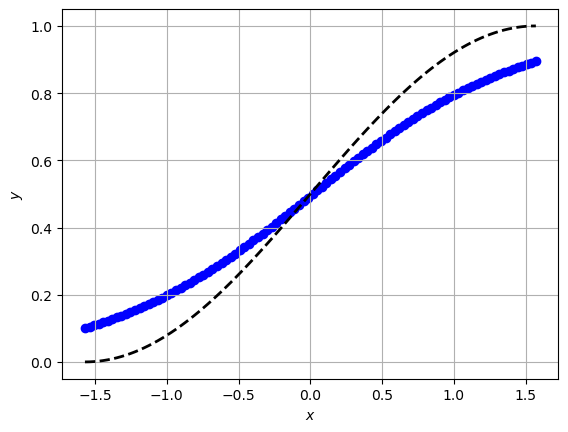

Epoch: 5
Error: 0.341810117005321


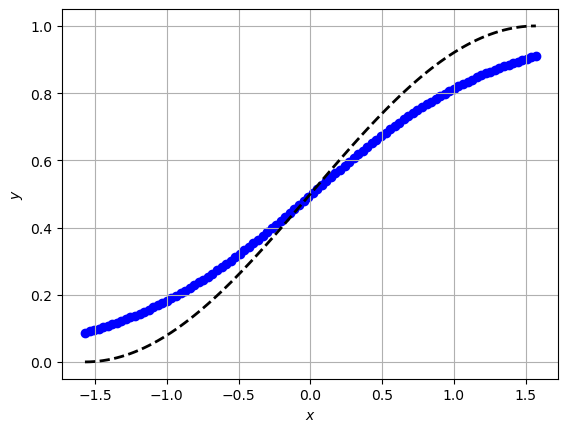

Epoch: 6
Error: 0.259705932845146


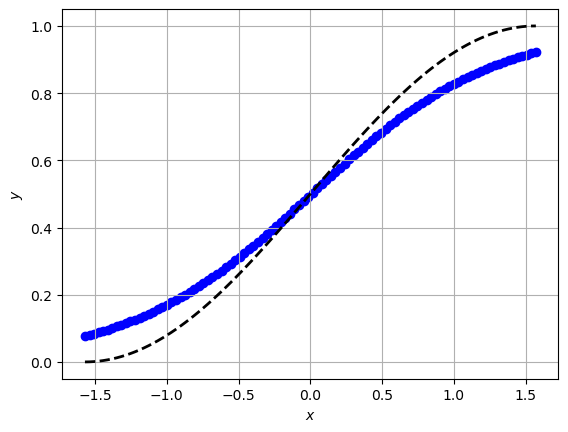

Epoch: 7
Error: 0.2036914292495999


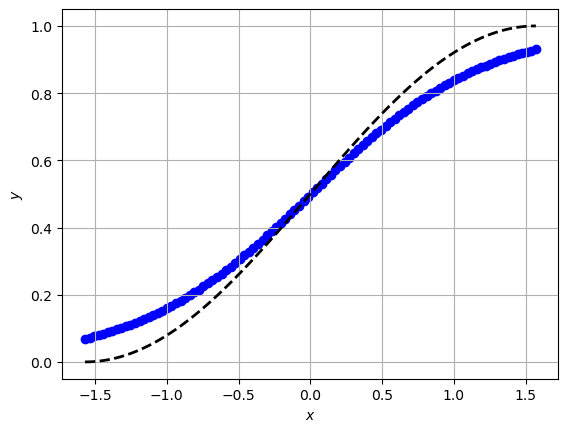

Epoch: 8
Error: 0.16381178417483028


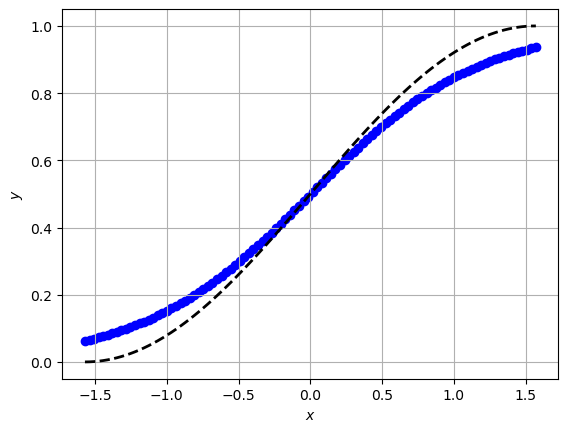

Epoch: 9
Error: 0.13447168422332606


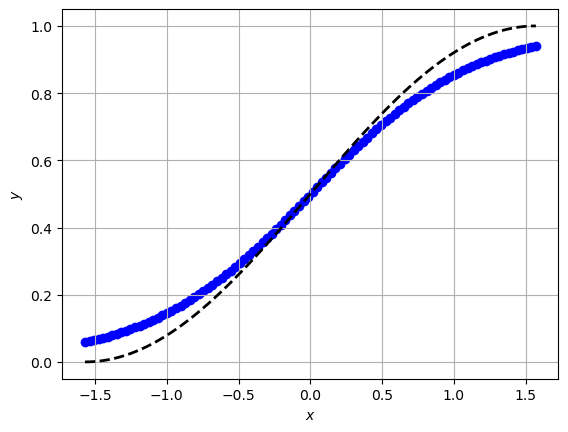

Epoch: 100
Error: 0.018722116070852213


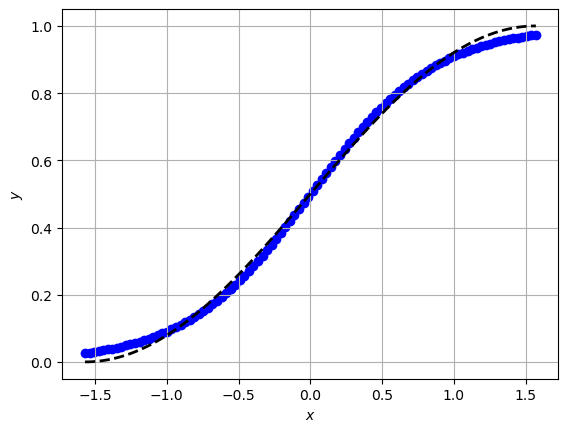

In [22]:
eta = 0.1
num_epochs = 100

w = 0.2
b = -0.2

for epoch in range(num_epochs):
    if epoch < 10:
        Y = forward(X, w, b)
        draw_output(X, Y, T, epoch)

    idx_rand = np.arange(len(X))
    np.random.shuffle(idx_rand)

    for i in idx_rand:
        x = X[i]
        t = T[i]

        y = forward(x, w, b)
        grad_w, grad_b = backward(x, y, t)
        w -= eta * grad_w
        b -= eta * grad_b


Y = forward(X, w, b)
draw_output(X, Y, T, num_epochs)